# Analysis on bank stock value change after the financial crisis (2006-2015) 

In [51]:
Bank of America
CitiGroup
Goldman Sachs
JPMorgan Chase
Morgan Stanley
Wells Fargo

SyntaxError: invalid syntax (1723294780.py, line 1)

In [123]:
from pandas_datareader import data,wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.express as px

In [107]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)
BAC = data.DataReader("BAC", 'quandl', start, end, api_key='CcSjCoQNhJnsp85Kdema')
C = data.DataReader("C", 'quandl', start, end, api_key='CcSjCoQNhJnsp85Kdema')
GS = data.DataReader("GS", 'quandl', start, end, api_key='CcSjCoQNhJnsp85Kdema')
JPM = data.DataReader("JPM", 'quandl', start, end, api_key='CcSjCoQNhJnsp85Kdema')
MS = data.DataReader("MS", 'quandl', start, end, api_key='CcSjCoQNhJnsp85Kdema')
WFC = data.DataReader("WFC", 'quandl', start, end, api_key='CcSjCoQNhJnsp85Kdema')

In [108]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [109]:
#make 1 big df containing all the data
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [110]:
#finding highest price for each stock
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

In [111]:
#create a returns df
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

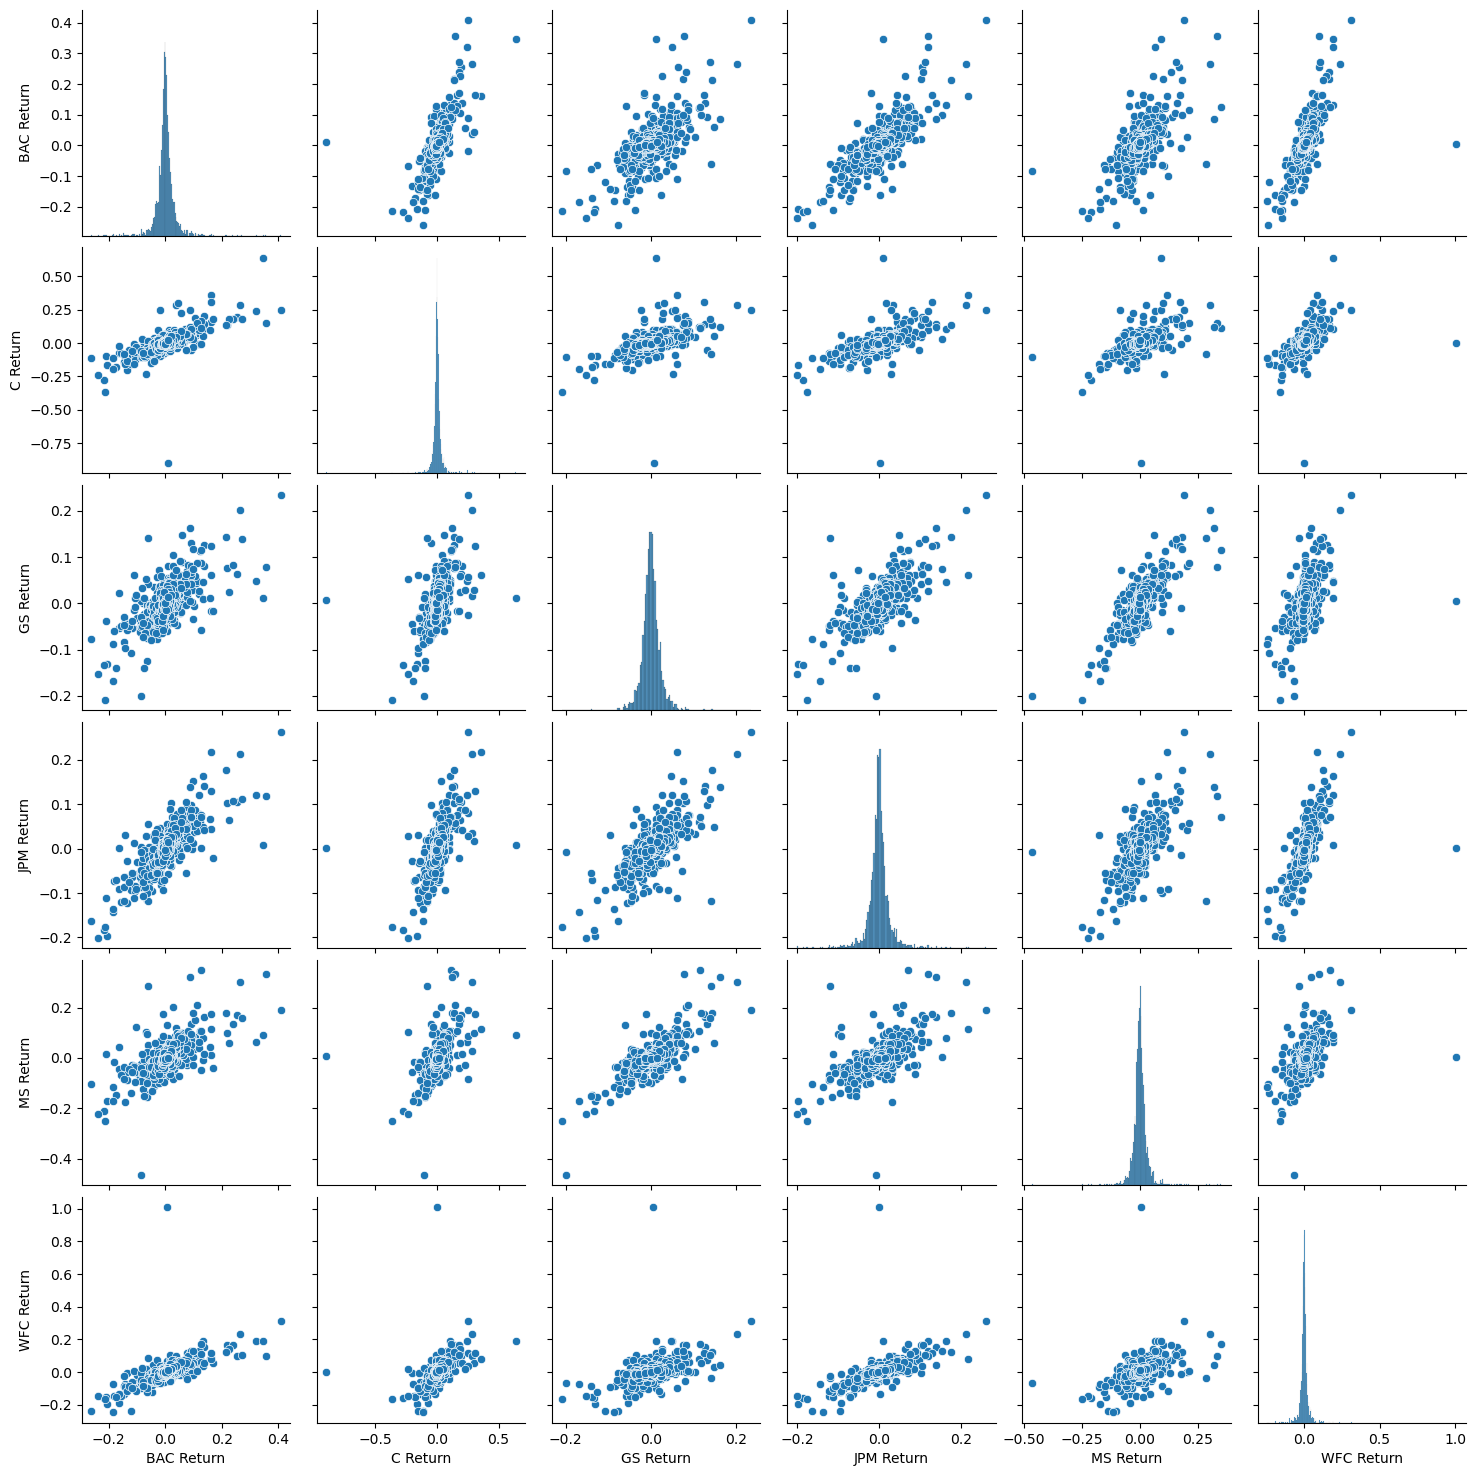

In [112]:
#need to start from 1 as first row is NaN
#creating a pairplot for the returns table
sns.pairplot(returns[1:])

In [114]:
#find the best and wosrt day returns
returns.idxmin()

BAC Return   2009-04-08
C Return     2011-05-06
GS Return    2008-11-21
JPM Return   2009-01-20
MS Return    2008-10-10
WFC Return   2008-07-15
dtype: datetime64[ns]

In [115]:
returns.idxmax()

BAC Return   2009-01-16
C Return     2009-02-26
GS Return    2009-01-16
JPM Return   2009-01-16
MS Return    2008-10-08
WFC Return   2006-08-11
dtype: datetime64[ns]

In [116]:
#use std. dev. to find the riskiest bank stock 
returns.std()

BAC Return    0.037062
C Return      0.043327
GS Return     0.025155
JPM Return    0.027392
MS Return     0.035599
WFC Return    0.035655
dtype: float64

In [117]:
#use std. dev. to find the riskiest bank stock for year 2007
returns.loc['2007-01-01':'2007-12-31'].std()

C:\Users\danie\AppData\Local\Temp\ipykernel_3120\1593896138.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  returns.loc['2007-01-01':'2007-12-31'].std()


BAC Return    0.013865
C Return      0.018394
GS Return     0.021665
JPM Return    0.016957
MS Return     0.025800
WFC Return    0.017159
dtype: float64

C:\Users\danie\AppData\Local\Temp\ipykernel_3120\2644434733.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  sns.displot(returns.loc['2007-01-01':'2007-12-31']['MS Return'],bins=50)


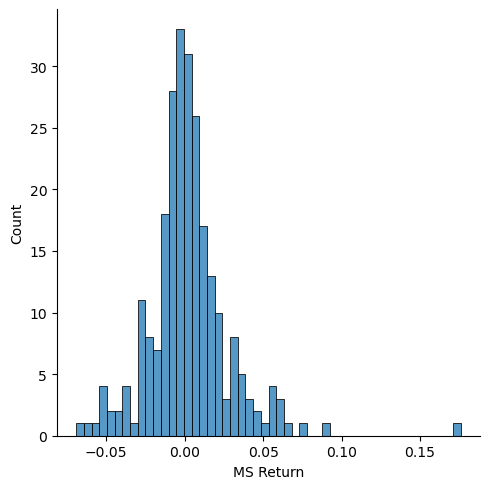

In [118]:
#creating a displot for 2007 Morgan Stanley returns
sns.displot(returns.loc['2007-01-01':'2007-12-31']['MS Return'],bins=50)

C:\Users\danie\AppData\Local\Temp\ipykernel_3120\4054539826.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],bins=50)


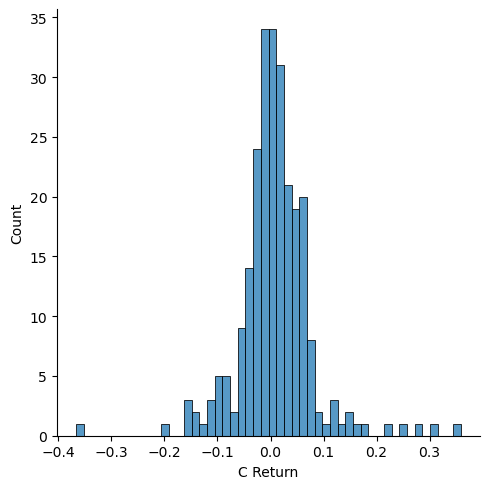

In [119]:
#displot for 2008 citigroup
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],bins=50)
#citigroup is almost 10x of another bank 

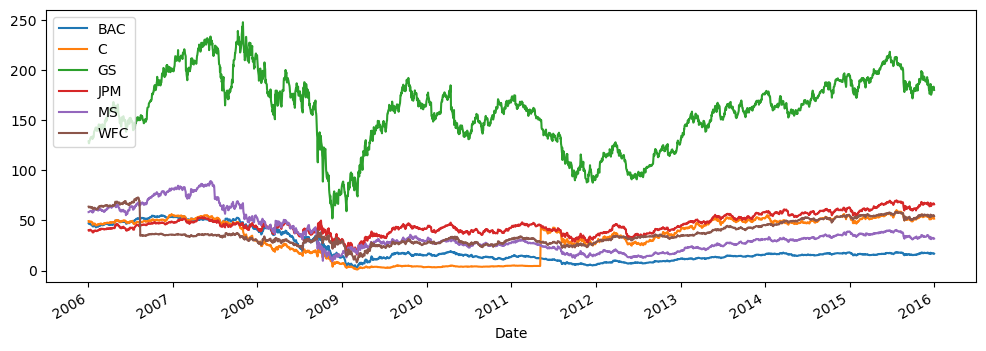

In [120]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

In [125]:
#create an interactive line using plotly express for stock close prices
px.line(bank_stocks.xs(key='Close',axis=1,level='Stock Info'))

C:\Users\danie\AppData\Local\Temp\ipykernel_3120\856540364.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\danie\AppData\Local\Temp\ipykernel_3120\856540364.py:4: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



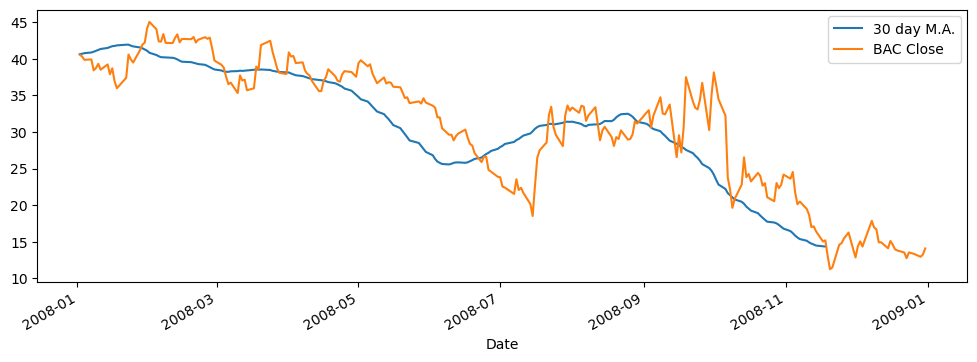

In [134]:
#rolling 30 day average for close pice for BAC for 2008
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day M.A.')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()


<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

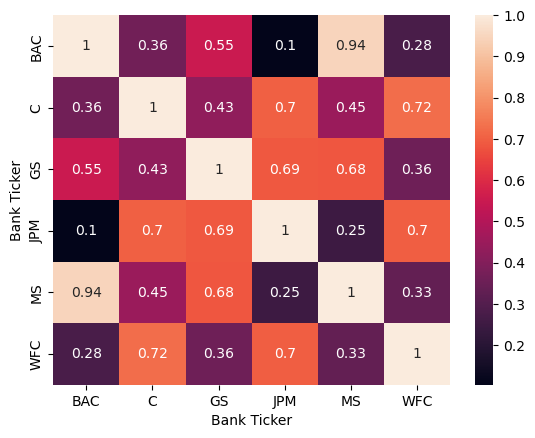

In [137]:
#create heatmap of correlation between the stocks closing price
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

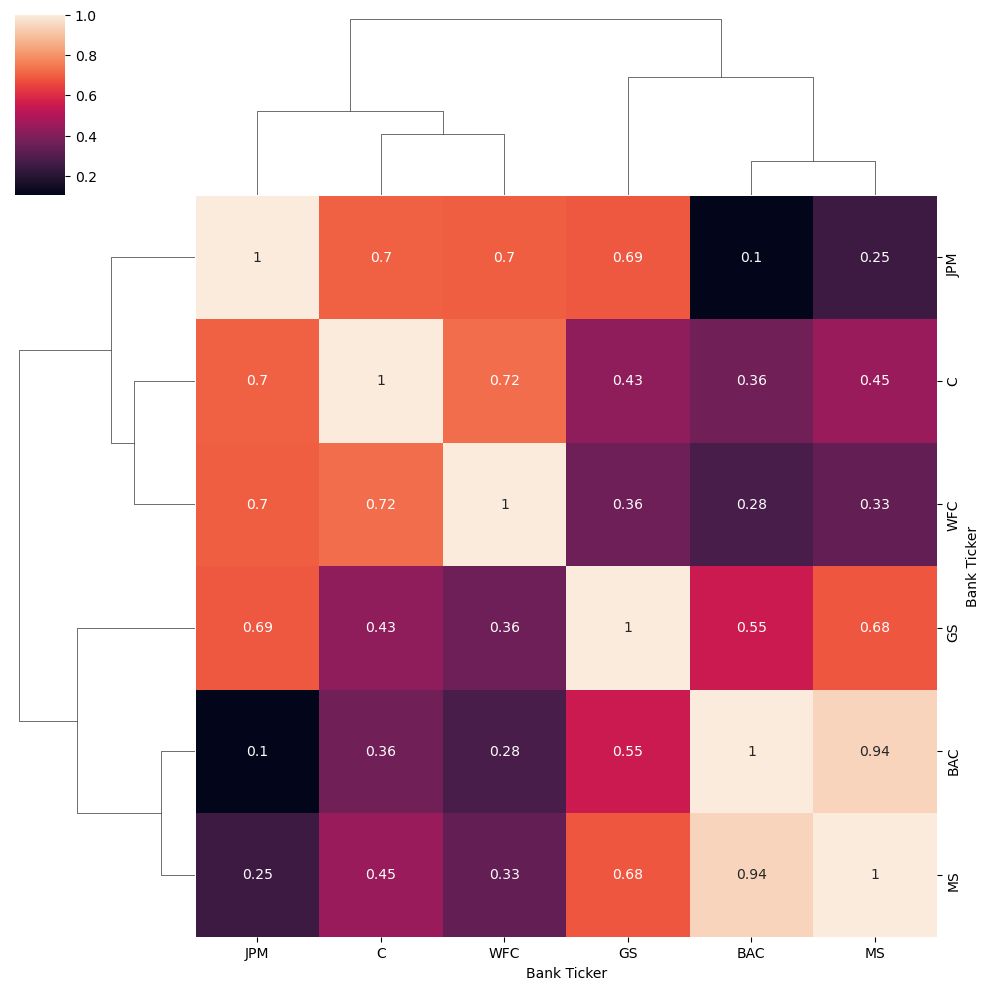

In [138]:
#create clustermap of correlation between the stocks closing price
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)